In [89]:
%load_ext autoreload
%autoreload 2

import beessna.bib.preprocessing as prep
import sys
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import os

from bb_binary import FrameContainer, Repository, load_frame_container
from pandas import DataFrame, Series

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
def get_files(path):
    repo = Repository(path)
    file = list(repo.iter_fnames())
    a = [f.split('/')[-1].split("_")[1] for f in file]
    l = len(a)/4
    npa = np.array(file).reshape(int(l),4)
    return npa

In [184]:
def run(month, path):
    CONFIDENCE = 0.9
    DISTANCE = 160
    MONTH = month
    xmax = 3000
    ymax = 4000
    LENGTH = 3

    #f = "../../data/1h/"
    # /storage/mi/aschle/1day/
    f = path
    p = "2015" + str(MONTH) + "2215"
    #p = "2015" + str(MONTH) + "22"
    path = f+p
    print(path)


    files = get_files(path)

    dataframes = DataFrame()
    
    for e, file_list in enumerate(files):

        for i in list(range(4)):
            fc = load_frame_container(file_list[i])
            df = prep.get_dataframe(fc)
            df = prep.calcIds(df,CONFIDENCE)
            df['frame_idx'] = df['frame_idx'] + e*1024

            dataframes = pd.concat([dataframes, df])
    
    return dataframes

In [79]:
def set_detections(group, dft):
    idx = group.frame_idx.iat[0]
    dft.loc[group['id'],idx] = 1

In [80]:
def df_to_timeseries(df):
    num_columns = len(df.frame_idx.unique())
    u_id = df.id.unique()
    dft = DataFrame(0, index=u_id, columns=np.arange(num_columns))
    df.groupby('frame_idx').apply(lambda x: set_detections(x,dft))
    return dft

In [81]:
def get_ketten(kette, val):
    kette = kette.apply(str)
    s = kette.str.cat(sep='')
    ss = s.split(val)
    return [len(x) for x in ss if len(x) > 0]

In [82]:
def run_and_plot(month, path):
    df = run(month, path)
    dft = df_to_timeseries(df)
    chains0 = dft.apply(get_ketten, axis=1, args=["1"])
    list_0 = [j for i in chains0 for j in i]
    plot_hist(list_0)
    print(DataFrame(list_0).describe())
    return list_0, dft

In [83]:
def plot_hist(list_0):
    ax = sns.distplot(list_0, bins=100)
    ax.set(yscale="log")
    ax.set_xlim(0,)
    ax.set_title("How long are bees absent? (1 Hour Dataset)")
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Length of Zeros")
    ax.figure.set_size_inches(12,7)
    sns.plt.show()

# 1 Hour August

data/1h/2015082215


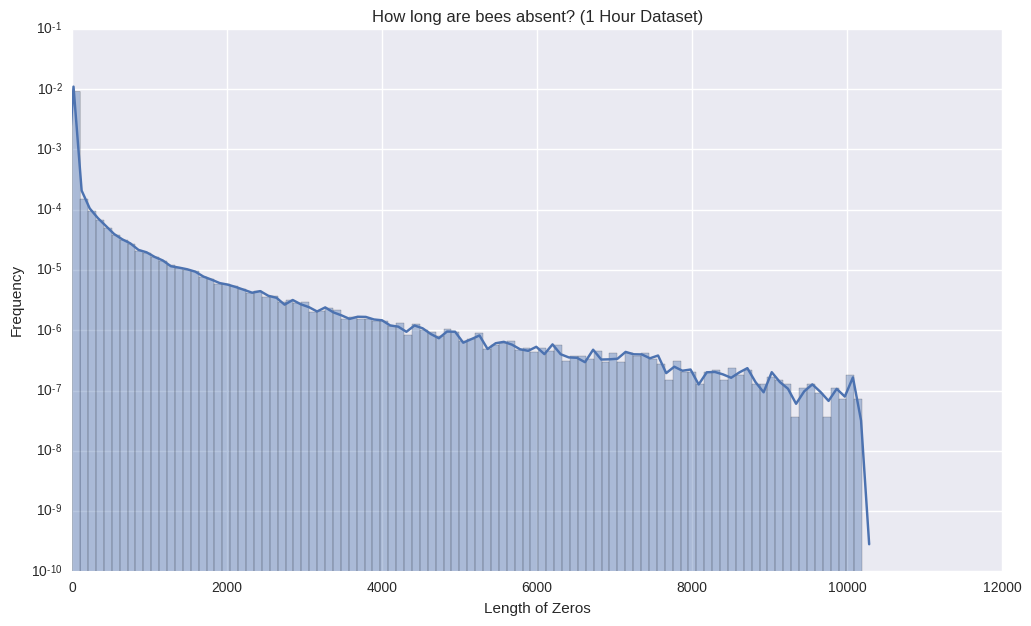

                   0
count  533334.000000
mean       70.279487
std       412.712061
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max     10195.000000
CPU times: user 10min 50s, sys: 8.32 s, total: 10min 58s
Wall time: 9min 44s


In [185]:
%time l08, dft_l08 = run_and_plot("08", "data/1h/")

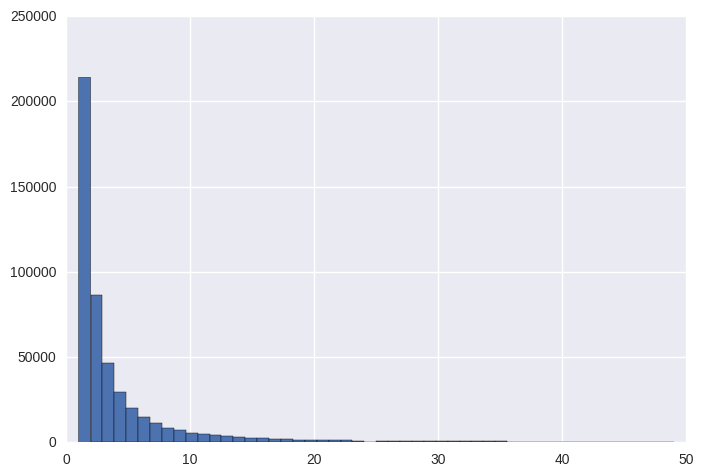

In [175]:
plt.hist([x for x in l08 if x < 50], bins=50)
#plt.yscale('log')
plt.xlim(0,50)
plt.show()

In [191]:
dft_l08.shape

(3969, 10240)

In [196]:
DataFrame(l08).median(axis=0)

0    2.0
dtype: float64

# 1 Hour September

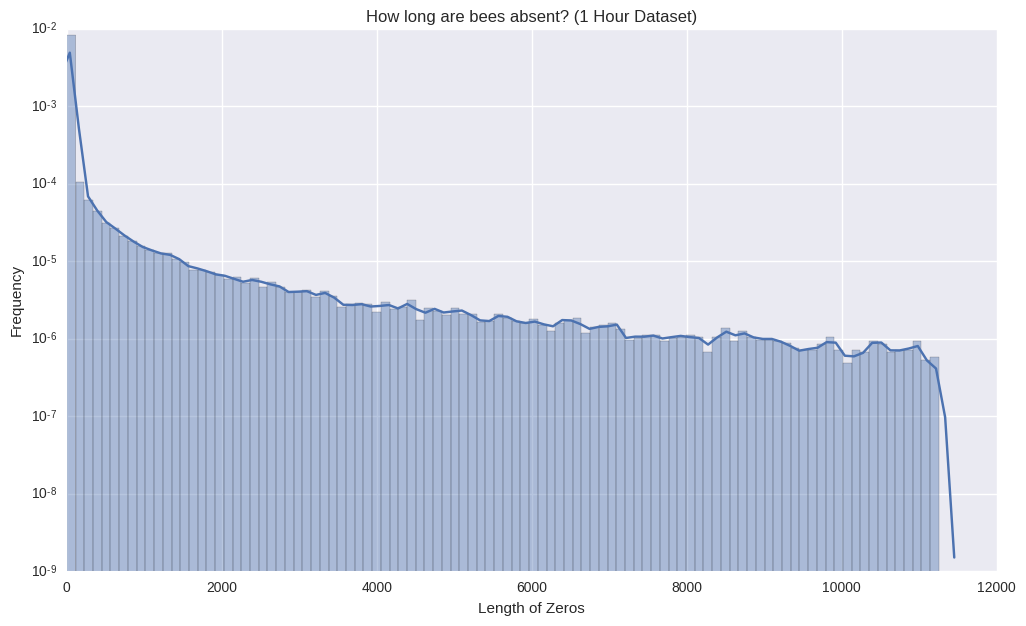

                   0
count  199481.000000
mean      124.109800
std       756.991602
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max     11253.000000
CPU times: user 6min 34s, sys: 3.61 s, total: 6min 38s
Wall time: 6min 10s


In [73]:
%time l09, dft_l09 = run_and_plot("09","data/1h/")

# 1 Hour October

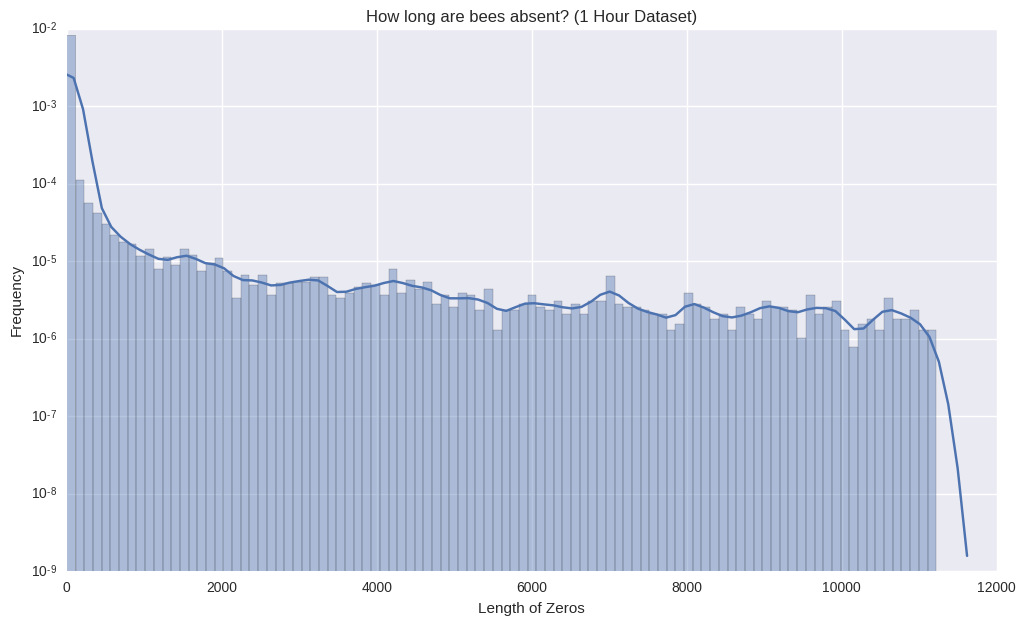

                  0
count  34435.000000
mean     204.104342
std     1072.382550
min        1.000000
25%        1.000000
50%        2.000000
75%        6.000000
max    11218.000000
CPU times: user 3min 43s, sys: 812 ms, total: 3min 44s
Wall time: 3min 36s


In [74]:
%time l10, dft_l10 = run_and_plot("10", "data/1h/")

# One day dataset

In [119]:
storage = "../../../../../../storage/mi/aschle/1day/"

In [ ]:
%time l_day, dft_day = run_and_plot("08", storage)

../../../../../../storage/mi/aschle/1day/20150822


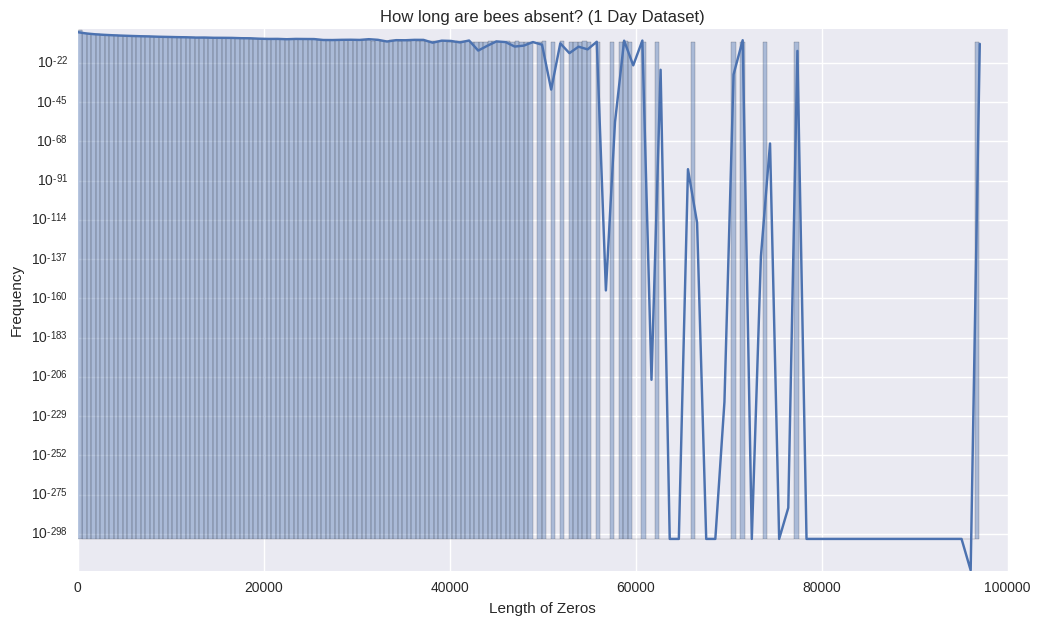

In [187]:
ax = sns.distplot(l_day, bins=200)
ax.set(yscale="log")
ax.set_xlim(0,)
ax.set_title("How long are bees absent? (1 Day Dataset)")
ax.set_ylabel("Frequency")
ax.set_xlabel("Length of Zeros")
ax.figure.set_size_inches(12,7)
sns.plt.show()

In [127]:
len(l_day)

11590072

In [129]:
len(l08)

533334

In [130]:
len(l_day)/len(l08)

21.731357835802704

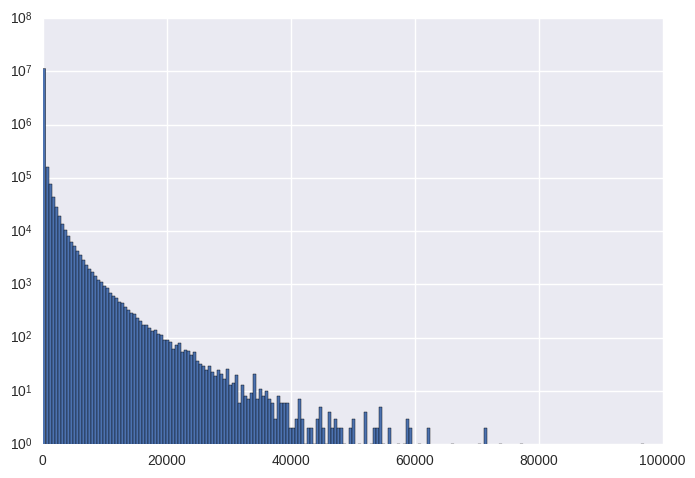

In [186]:
plt.hist(l_day, bins=200)
plt.yscale('log')
plt.show()

In [147]:
dft_day.shape[1]/3/60/60

23.988148148148145

In [148]:
dft_day.shape

(4096, 259072)

In [151]:
dft_day.shape[0]/2/2/2

512.0

In [152]:
DataFrame(l_day).describe()

,0
count,1.159007e+07
mean,8.531142e+01
std,6.215425e+02
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,9.693500e+04


In [188]:
DataFrame(l_day).median()

0    2.0
dtype: float64

In [190]:
chains_day = dft_day.apply(get_ketten, axis=1, args=["1"])

KeyboardInterrupt: 